<a href="https://colab.research.google.com/github/kunal24bit/NLP/blob/main/SMS_Spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
import numpy as np
import pandas as pd
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [8]:
message = pd.read_csv("SMSSpamCollection", sep = '\t', names= ['labels', 'messages'])

In [9]:
message

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
message['messages'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
wordnet = WordNetLemmatizer()
len(message)

5572

In [17]:
corpus = []
for i in range(len(message)):
  review = re.sub('[^a-zA-Z]', ' ', message['messages'][i])
  review = review.lower()
  review = review.split()
  review = [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
  review = " ".join(review)
  corpus.append(review)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()





In [26]:
y = pd.get_dummies(message['labels'])

In [27]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
y = y.iloc[:,1].values

In [32]:
print(y.shape)
y

(5572,)


array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4179, 7098)
(1393, 7098)
(4179,)
(1393,)


In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [39]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = lr.predict(x_test)

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [56]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [52]:
confusion_matrix(y_test, y_pred)

array([[1206,    1],
       [  52,  134]])

In [53]:
def model_val(y_true, y_pred):
    tp, fp, tn, fn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    specificity = tn/(tn+fp)
    f1_score = 2*(precision*recall)/(precision+recall)
    auc  = roc_auc_score(y_test, y_pred)
    result = {'Accuracy': accuracy, 
             'precision': precision,
             'recall': recall,
             'specificity': specificity,
             'f1_score': f1_score,
             'auc': auc}
    return result

In [54]:
model_val(y_test, y_pred)

{'Accuracy': 0.9030868628858578,
 'auc': 0.8598008035563158,
 'f1_score': 0.9469964664310955,
 'precision': 0.9991714995857498,
 'recall': 0.9,
 'specificity': 0.9811320754716981}

In [57]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Text(0, 0.5, 'true positive rate')

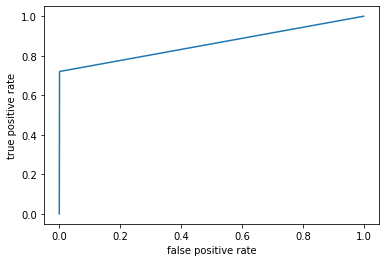

In [59]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")